In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#### Згенерований набір даних

##### створимо

In [2]:
import numpy as np
np.random.seed(42)  # для відтворюваності

n_samples = 500

# Дві ознаки
feature_0 = np.random.normal(loc=0, scale=1, size=n_samples)
feature_1 = np.random.normal(loc=0, scale=1, size=n_samples)

# Генеруємо цільову змінну (класи 0 та 1)
# Наприклад, клас 1, якщо feature_0 + feature_1 + шум > 0, інакше 0
noise = np.random.normal(0, 0.5, n_samples)
target = ((feature_0 + feature_1 + noise) > 0).astype(int)

# Створюємо DataFrame
df = pd.DataFrame({
   "feature_0": feature_0,
   "feature_1": feature_1,
   "target": target
})

df.head()

,feature_0,feature_1,target
0,0.496714,0.926178,1
1,-0.138264,1.909417,1
2,0.647689,-1.398568,0
3,1.523030,0.562969,1
4,-0.234153,-0.650643,0


#### Попередній аналіз даних: пропущені значення, типи даних, 

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  500 non-null    float64
 1   feature_1  500 non-null    float64
 2   target     500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


feature_0    0
feature_1    0
target       0
dtype: int64

##### Попередня обробка даних: Заповнення пропусків (середнє для числових, мода для категоріальних), One-Hot Encoding для категоріальних змінних, Масштабування (для логістичної регресії)

In [4]:
X = df[["feature_0", "feature_1"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

##### Побудова моделі

In [5]:
model = LogisticRegression()
model.fit(X_train_s, y_train)


y_pred = model.predict(X_test_s)

acc = accuracy_score(y_test, y_pred)
print("\nТочність моделі:", acc)


print("\nЗвіт по метриках моделі:\n", classification_report(y_test, y_pred))


Точність моделі: 0.92

Звіт по метриках моделі:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.92      0.92      0.92        53

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



##### Візуалізація результатів

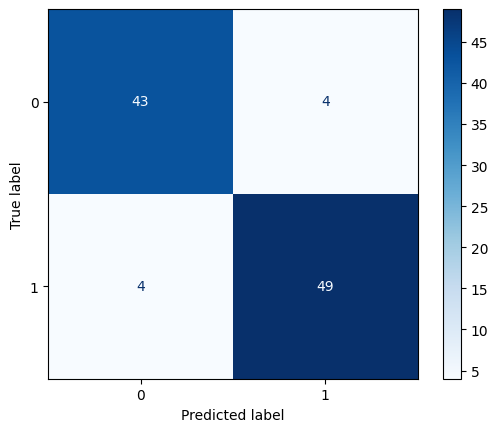

In [6]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()